# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


#### [Шаг 1. Загрузите данные и подготовьте их к анализу](#cell1)
Загрузите данные о гипотезах, визитах, заказах. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. 

Данные для первой части
Файл /datasets/hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


#### [Шаг 2. Приоритизация гипотез](#cell2) 
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### [Шаг 3. Анализ A/B-теста](#cell3) 
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

#### [Шаг 4. Вывод](#cell4) 

# Шаг 1. Загрузите данные и подготовьте их к анализу <a class="anchor" name="cell1"></a>
Загрузите данные о гипотезах, визитах, заказах. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import math
import scipy.stats as stats
from scipy import stats as st

In [2]:
visitors = pd.read_csv('/datasets/visitors.csv')
orders = pd.read_csv('/datasets/orders.csv')
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
visitors.head(10)# получение первых 10 строк таблицы visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [4]:
visitors.info() # посмотрим на размер таблицы visitors и типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [5]:
visitors.isna().sum() # подсчёт пропусков в таблице visitors

date        0
group       0
visitors    0
dtype: int64

In [6]:
visitors.duplicated().sum() # подсчёт явных дубликатов в таблице visitors

0

In [7]:
orders.head(10) # получение первых 10 строк таблицы orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
orders.info() # посмотрим на размер таблицы orders и типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.isna().sum() # подсчёт пропусков в таблице orders

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
orders.duplicated().sum() # подсчёт явных дубликатов в таблице orders

0

In [11]:
orders['visitorId'] = orders['visitorId'].astype('Int64')

In [12]:
display(orders.loc[orders.duplicated(subset=['visitorId', 'group', 'revenue'], keep=False)]) #поищем дубликаты по выручке и пользователям
display(orders.loc[orders.duplicated(subset=['transactionId'], keep=False)]) #поищем дубликаты по заказам
display(orders.loc[orders.duplicated(subset=['visitorId', 'group'], keep=False)]) #поищем дубликаты по пользователям и тестам

,transactionId,visitorId,date,revenue,group
507,4067849009,2108163459,2019-08-06,580,A
556,571224785,3941503500,2019-08-06,4990,B
558,3621273697,3941503500,2019-08-06,4990,B
692,3586870909,2458001652,2019-08-09,5227,B
740,405281389,2108163459,2019-08-09,580,A
916,527333943,2458001652,2019-08-08,5227,B


,transactionId,visitorId,date,revenue,group


,transactionId,visitorId,date,revenue,group
15,2550768810,2742574263,2019-08-15,15277,B
26,2223239646,199603092,2019-08-15,3488,A
32,3666913472,2038680547,2019-08-15,1680,B
33,486237576,2378935119,2019-08-15,1650,A
41,2594268419,237748145,2019-08-15,1090,A
...,...,...,...,...,...
1172,3898641900,3803269165,2019-08-14,790,B
1175,1373388206,3717692402,2019-08-14,2400,B
1182,2682156369,1668030113,2019-08-14,1290,B
1189,4082620617,393266494,2019-08-14,31550,B


In [13]:
hypothesis.head(10) # получение первых 10 строк таблицы hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [14]:
hypothesis.info() # посмотрим на размер таблицы hypothesis и типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [15]:
#поменяем типы данных
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [16]:
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   Int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: Int64(1), datetime64[ns](1), int64(2), object(1)
memory usage: 48.1+ KB


In [17]:
#для удобства переименуем столбцы в таблице hypothesis
hypothesis = hypothesis.rename(columns={'Hypothesis' : 'hypothesis', 'Reach' : 'reach', 'Impact' : 'impact', 'Confidence' : 'confidence', 'Efforts' : 'efforts' })  
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [18]:
#для удобства переименуем столбцы в таблице orders
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


**Вывод:** данные в таблицах без пропусков и явных дубликатов. Выявлена ошибка в типах данных - в таблицах с заказами и визитами столбцы с датами привели к соответствующему типу данных. А также заголовки столбцов в таблице с гипотезами и заказами привели к нижнему регистру. Также нашли пользователей, которые есть в таблице заказов и в группе А и в группе В - исправим на следующих этапах.

# Шаг 2. Приоритизация гипотез <a class="anchor" name="cell2"></a>
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [19]:
#посмотрим на все гипотезы
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [20]:
#применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [21]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [22]:
#применим фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

In [23]:
hypothesis[['hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.125000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.000000


**Вывод:** применив фреймворк ICE наиболее перспективные гипотезы оказались:
- 8 - Запустить акцию, дающую скидку на товар в день рождения
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Применив фремворк RICE наиболее перспективными оказались гипотезы: 7, 2, 0, 6
- 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Приоретизация гипотез как мы видим изменилась. Сильная гипотеза 8 ушла с лидирующих позиций в рейтинге RICE, так как имеет низкий параметр Reach, что логично ведь количество пользователей котороых затронет акция в день рождения ниже, чем количество прользователей страниц сайта (гипотеза 7).

В лидерах в рейтинге RICE появилась новая гипотеза 2, которая имеет высокий параметр Reach, что также говорит о том что она затронет большое количество пользователей. 

Так как наша главная задача рост выручки интернет-магазина, то приоретизация гипотез будет принята согласно рейтингу RICE 7, 2, 0, 6 - так как очень важно учитывать охват пользователей этой гипотезой.

# Шаг 3. Анализ А/В-теста <a class="anchor" name="cell3"></a>
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 
- Остановить тест, зафиксировать победу одной из групп. 
- Остановить тест, зафиксировать отсутствие различий между группами. 
- Продолжить тест.

**Прежде чем переходить к анализу АВ теста, нужно выяснить масштаб ошибки, которую мы нашли ранее, - вхождения ряда пользователей в оба теста.**

In [24]:
#найдем количество дубликатов пользователей, которые попали и в А группу тестирования и в В
#для начала создадим списки пользователей попавших в группы
group_a = orders[orders['group']=='A']['visitor_id']
group_b = orders[orders['group']=='B']['visitor_id']
display(group_a)
display(group_b)

2       4069496402
7       78758296  
8       295230930 
10      879864040 
12      3213223594
           ...    
1187    132143192 
1188    1022829655
1193    370388673 
1194    573423106 
1195    1614305549
Name: visitor_id, Length: 557, dtype: Int64

0       3312258926
1       3642806036
3       1196621759
4       2322279887
5       935554773 
          ...     
1189    393266494 
1190    1197745035
1191    608641596 
1192    3733762160
1196    2108080724
Name: visitor_id, Length: 640, dtype: Int64

In [25]:
#найдем пересечение в этих списках и посчитаем количество пользователей которые попали в обе группы
error = pd.Series(list(set(group_a) & set(group_b)))
error.nunique()

58

In [26]:
#это ошибка произошла на этапе сбора данных и выяснить точные причины мы не можем
#создадим новый столбец err который обозначит принадлежит ли заказ пользователю, который входил в оба теста 
#и посмотрим сколько таких заказов

orders['err'] = orders.visitor_id.isin(error)
orders['err'].value_counts()

False    1016
True     181 
Name: err, dtype: int64

**Вывод** Так как количество таких заказов и пользователей небольшое и сумма пользователей также отоборажена в таблице visitors,в которой найти и удалить точечно ошибочные заказы мы не можем, то правильнее будет оставить всё как есть и не удалять их из таблицы orders.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [27]:
# выводим сводную таблицу с группой датой и суммой выручки
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))\
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])

orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [28]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [29]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']
cummulative.head() 

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856


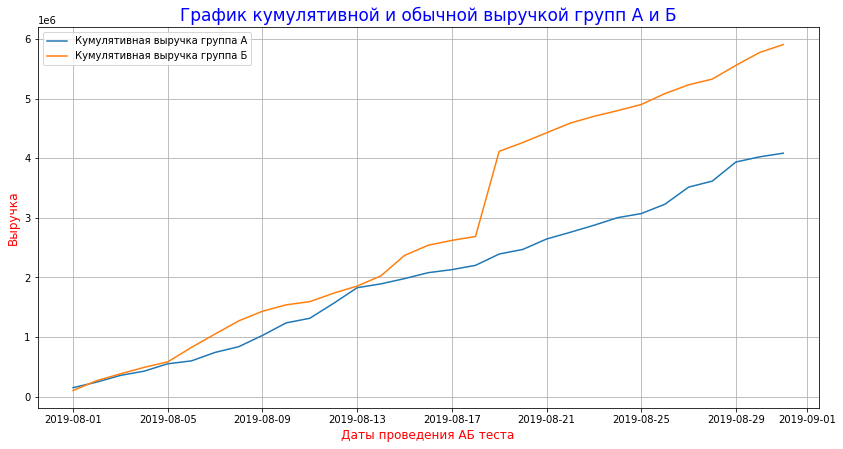

In [30]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]

plt.figure(figsize=(14, 7))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной и обычной выручкой групп А и Б', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Выручка',fontsize=12, color='red')
plt.legend([ 'Кумулятивная выручка группа А', 'Кумулятивная выручка группа Б', 'выручка группа А', 'выручка группа Б'])
plt.grid(True)
plt.show()

**Вывод:** видим выброс 19.08.2019 в группе В по выручке, который мог быть связан с некорректным сбором данным или с рекламной компанией, которая могла привести к росту выручки. Группа В растет линейно.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

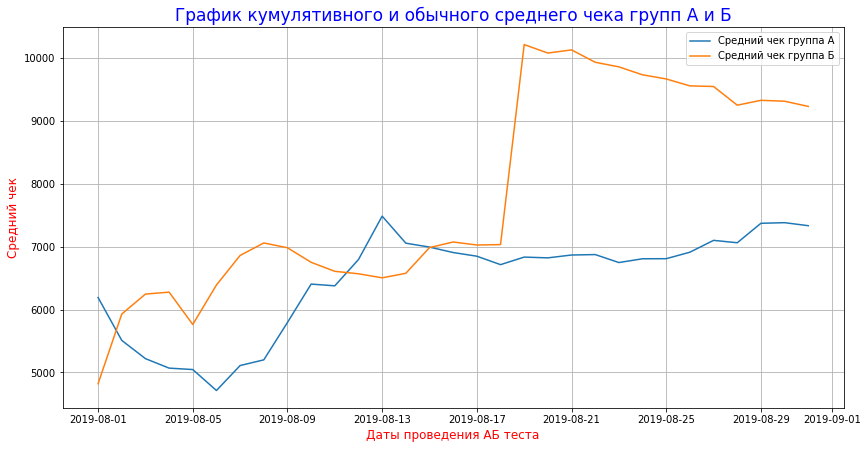

In [31]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]

plt.figure(figsize=(14, 7))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного и обычного среднего чека групп А и Б', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Средний чек',fontsize=12, color='red')
plt.legend([ 'Средний чек группа А', 'Средний чек группа Б', 'Средний чек А', 'Средний чек группа Б'])
plt.grid(True)
plt.show()

**Вывод:** явно влияют выбросы данных на резкие скачки среднего чека

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

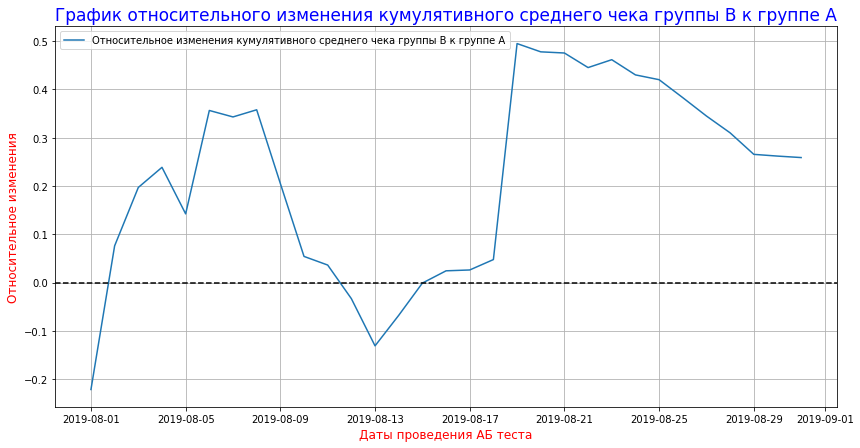

In [32]:
df = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['average_check_B'] / df['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Относительное изменения',fontsize=12, color='red')
plt.legend([ 'Относительное изменения кумулятивного среднего чека группы B к группе A', 'Средний чек группа Б'])
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.show()

**Вывод:** снова резкие скачки среднего чека в определенные даты, выбросы оказывают влияние 

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

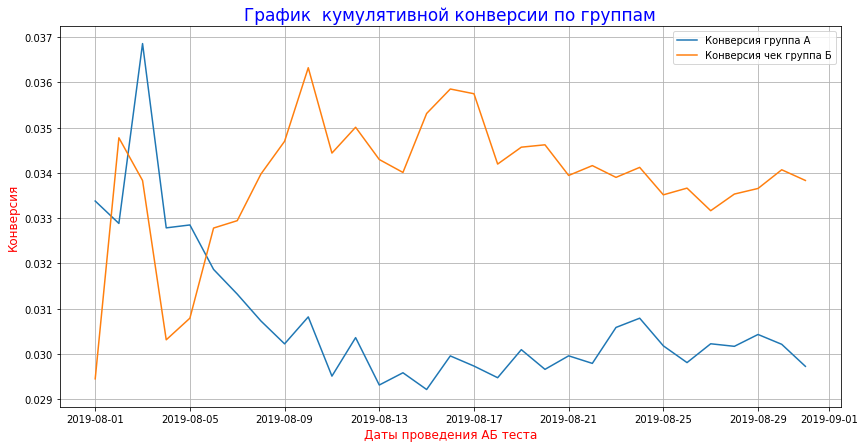

In [33]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]

plt.figure(figsize=(14, 7))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График  кумулятивной конверсии по группам', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Конверсия',fontsize=12, color='red')
plt.legend([ 'Конверсия группа А', 'Конверсия чек группа Б'])
plt.grid(True)
plt.show()

**Вывод:** В первые 5 дней группа А имела большую конверсию, но потом начала снижаться, а группа В показала рост. Сейчас скачков в конверсии не наблюдается, группа В уверенно лидирует

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

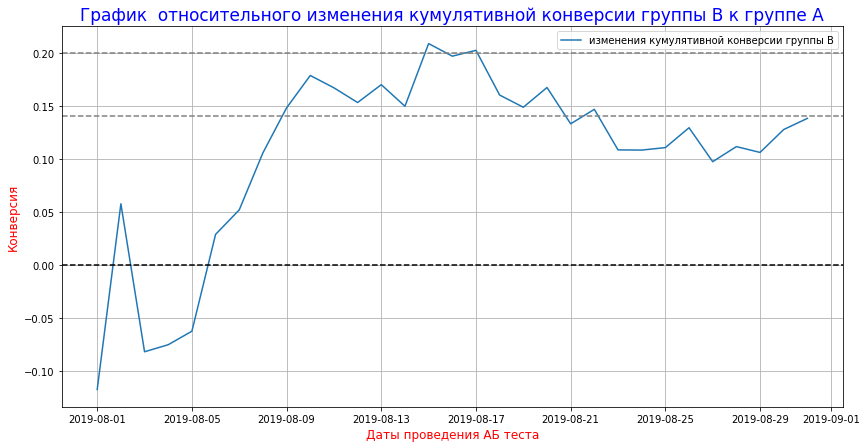

In [34]:
df = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['conversion_B'] / df['conversion_A']-1)
plt.title('График  относительного изменения кумулятивной конверсии группы B к группе A', fontsize=17, color='blue')
plt.xlabel('Даты проведения АБ теста',fontsize=12, color='red')
plt.ylabel('Конверсия',fontsize=12, color='red')
plt.legend([ 'изменения кумулятивной конверсии группы B'])
# задаем масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.grid(True)
plt.show()

**Вывод**: конверсия группы В уверенно лидирует. До 22 августа наблюдается рост кумулятивной конверсии группы В относительно группы А до 20%, начиная с 22 августа наблюдается снижение и на момент окончания теста конверсия группы В была больше на 14%.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [35]:
#выясним сколько на каждого пользователя пришлось заказов

orders_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})
orders_user

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


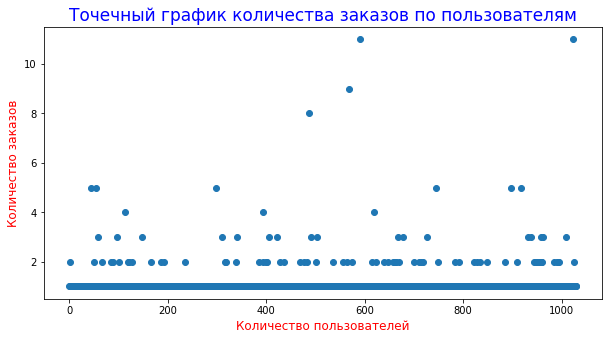

In [36]:
#построим точечную диаграмму методом scatter()
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0,len(orders_user)))
plt.scatter(x_values, orders_user['orders'])
plt.title('Точечный график количества заказов по пользователям', fontsize=17, color='blue')
plt.xlabel('Количество пользователей',fontsize=12, color='red')
plt.ylabel('Количество заказов',fontsize=12, color='red');

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [37]:
display(np.percentile(orders_user['orders'], [90, 95, 99])) 

array([1., 2., 4.])

**Вывод:** мы отсеиваем от 1% до 5% данных с крайними значениями. В нашем случае не более 5% пользователей делали больше 2 заказов и не более 1% больше 4. Все, что за 99 перцентилем — аномально.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

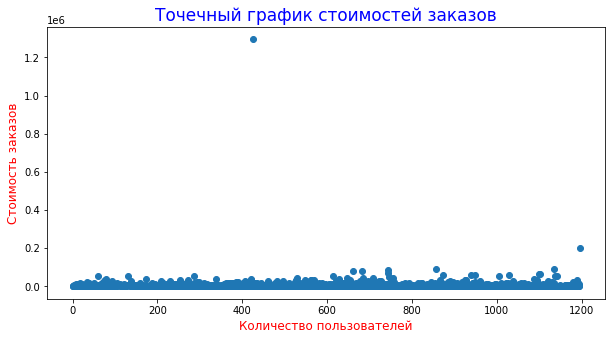

In [38]:
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0,len(orders['revenue'] < 0.2)))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов', fontsize=17, color='blue')
plt.xlabel('Количество пользователей',fontsize=12, color='red')
plt.ylabel('Стоимость заказов',fontsize=12, color='red')
plt.show();

**Вывод:** тут мы видим как раз те выбросы, которые появлялись на графиках ранее - большая часть заказов была сделана на сумму в пределах 0.15, но есть несколько заказов стоимостью 0.2 и один более 1.2 - что как раз и является нашими выбросами 

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [39]:
display(np.percentile(orders['revenue'], [90, 95, 99])) 

array([18168. , 28000. , 58233.2])

**Вывод:** 90% заказов стоят больше 18168, 5% больше 28000 и только 1% больше 58233.2. Всё что за 99 перцентилем — аномально.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения

In [40]:
#Создадим отдельно таблицы с конверсиями каждой группы теста
#и посчитайтаем статистическую значимость различия конверсии по результатам АВ теста.
#Применим тест Манна-Уитни
orders_usersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_usersA.columns = ['user_id', 'orders']
display(orders_usersA.head())

orders_usersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_usersB.columns = ['user_id', 'orders'] 
display(orders_usersB.head())

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [41]:
visitors_dailyA = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_dailyA.columns = ['date', 'visitors_date']
display(visitors_dailyA.head())

,date,visitors_date
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [42]:
visitors_dailyB = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_dailyB.columns = ['date', 'visitors_date']
display(visitors_dailyB.head())

,date,visitors_date
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [43]:
orders_dailyA = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_dailyA.columns = ['date', 'orders_date', 'revenue_date']
display(orders_dailyA.head(2))

orders_dailyB = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_dailyB.columns = ['date', 'orders_date', 'revenue_date']
display(orders_dailyB.head(2))

,date,orders_date,revenue_date
0,2019-08-01,24,148579
1,2019-08-02,20,93822


,date,orders_date,revenue_date
0,2019-08-01,21,101217
1,2019-08-02,24,165531


In [44]:
#зададим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов 
#тем, кто ничего не заказал, будут соответствовать нули

sampleA = pd.concat([orders_usersA['orders'],
                     pd.Series(0, index=np.arange(visitors_dailyA['visitors_date'].sum() 
                                                  - len(orders_usersA['orders'])), name='orders')],axis=0)
display(sampleA.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [45]:
sampleB = pd.concat([orders_usersB['orders'],
                     pd.Series(0, index=np.arange(visitors_dailyB['visitors_date'].sum() 
                                                  - len(orders_usersB['orders'])), name='orders')],axis=0)
display(sampleB.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Нам необходимо знать если статистически значимая разница между конверсиями группы А и группы Б. Примем за нулевую гипотезу что конверсии равны, альтернативная гипотеза что между конверсиями группы А и группы Б, есть статистическая разница

Проверим это предположение Непараметрическим тестом Уилкоксона-Манна-Уитни. Этот тест нам подходит, так как в нашем случае есть большие (по сравнению с нормальным распределением) выбросы. По сравнению с алгебраическими метриками, непараметрический тест Уилкоксона-Манна-Уитни с этим справится лучше.

Если выходное значение больше 0.05 то нулевая гипотеза подтверждается и разница между конверсиями статистически не значима

In [46]:
display("Сырые данные Конверсия, p-value - {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

'Сырые данные Конверсия, p-value - 0.017'

In [47]:
display("Сырые данные Конверсия группы В больше чем конверсия группы А на {0:.1%}".format((orders_dailyB['orders_date'].sum()/visitors_dailyB['visitors_date'].sum())
                       /(orders_dailyA['orders_date'].sum()/visitors_dailyA['visitors_date'].sum())-1))

'Сырые данные Конверсия группы В больше чем конверсия группы А на 13.8%'

**Вывод:** p-value меньше 0.05 поэтому нулевую гипотезу отвергаем, конверсии не равны - в конверсии между группами есть статистически значимая разница. Также это подтверждает относительный прирост конверсии группы Б относительно группы А почти 14%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [48]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A не превосходит средний чек группы B
# H1: Средний чек A превосходит среднему чеку группы B
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.7292909855432458
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [49]:
display(orders[orders['group']=='A']['revenue'].mean())
display(orders[orders['group']=='B']['revenue'].mean())

7333.578096947936

9230.875

In [50]:
display("Cырые данные Средний чек группы В больше чем средний чек группы А на {0:.1%}"
        .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'Cырые данные Средний чек группы В больше чем средний чек группы А на 25.9%'

**Вывод:** даже относительный прирост среднего чека группы Б относительно группы А в почти 26% не дает нам статистически значимой разницы

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [51]:
# очистим данные
#удалим аномалии,всё что за 95 перцентилем
users_anomal= orders[orders['revenue'] > 28000]['visitor_id']

In [52]:
# найдем ID аномальных пользователей (кто платит больше 28 000 руб. и заказывает больше 2 заказов)
users_many_orders = pd.concat([orders_usersA[orders_usersA['orders'] > 2]['user_id'],
                                 orders_usersB[orders_usersB['orders'] > 2]['user_id']], axis = 0)
display(users_many_orders.head(2))
users_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

# соеденяем таблицы с ID тех кто заказывет много и тех кто платит много, удаляем дубликаты

ab_clear_users = pd.concat([users_many_orders, users_expensive_orders], axis = 0).drop_duplicates().sort_values()
display(ab_clear_users.head(2))

18    199603092
23    237748145
Name: user_id, dtype: int64

1099    148427295
18      199603092
dtype: Int64

In [53]:
#Удалим аномальных пользователей из таблицы
sampleA_filtr = pd.concat([orders_usersA[np.logical_not(orders_usersA['user_id'].isin(ab_clear_users))]['orders'],
                             pd.Series(0, index=np.arange(visitors_dailyA['visitors_date'].sum() - len(orders_usersA['orders'])),
                                       name='orders')],axis=0)

sampleB_filtr = pd.concat([orders_usersB[np.logical_not(orders_usersB['user_id'].isin(ab_clear_users))]['orders'],pd.Series(0, index=np.arange(visitors_dailyB['visitors_date'].sum() - len(orders_usersB['orders'])),name='orders')],axis=0) 

In [54]:
display(sampleA_filtr.head())
display(sampleB_filtr.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Нам необходимо выяснить если статистически значимая разница между конверсиями группы А и группы Б по чистым данным. Примем за нулевую гипотезу что конверсии равны, альтернативная гипотеза что между конверсиями группы А и группы В, есть статистическая разница

In [55]:
print("Очищенные данные конверсия  p-value - {0:.5f}".format(stats.mannwhitneyu(sampleA_filtr, sampleB_filtr)[1]))

#посмотрим разницу конверсий
print("Очищенные Конверсия группы В больше чем конверсия группы А на {0:.1%}".format(sampleB_filtr.mean()/sampleA_filtr.mean()-1)) 

Очищенные данные конверсия  p-value - 0.01304
Очищенные Конверсия группы В больше чем конверсия группы А на 17.3%


**Вывод:** p-value меньше 0,05 поэтому нулевую гипотезу отвергаем, конверсии не равны. В конверсии между группами есть статистически значимая разница. Относительный прирост конверсии группы В относительно группы А увеличился за счет удаления выбросов до 17%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

In [56]:
# Воспользуемся критерием Манна-Уитни
display("Очищенные данные p-value - {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(ab_clear_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(ab_clear_users)))]['revenue'])[1]))

'Очищенные данные p-value - 0.738'

In [57]:
print("Очищенные данные Средний чек группы В больше чем средний чек группы А на {0:.1%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(ab_clear_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(ab_clear_users)))]['revenue'].mean() - 1)) 

Очищенные данные Средний чек группы В больше чем средний чек группы А на -2.0%


**Вывод:** p-value больше 0,05 поэтому мы можем подтвердить нулевую гипотезу. В средних чеках между группами нет статистически значимой разница. Относительный прирост среднего чека группы В относительно группы А по "очищенными данным" упал до -2%

# Шаг 4. Вывод <a class="anchor" name="cell4"></a>

- Есть статистически значимое различия по конверсии между группами по «сырым», и по данным после фильтрации аномалий в пользу группы В;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», по данным после фильтрации аномалий среднего чека группы В относительно группы А по "очищенными данным" упал до -2%;

После очистки данных:
- разница в выручке между группами А и В сильно сократилось (этот вывод сделан на основании среднего чека)
- конверсии группы B лучше группы A, но нет значительной тенденции к улучшению - на момент окончания теста набдюдается рост, но ему предществовало падение
- по соотношению величины среднего чека группы В к Группе А мы видим что в начале теста средний чек группы Б был значительно выше чем группы А (возможно имела место проблема подглядывания), но в дальнейшем уменьшился и мы видим колебания около нулевой разницы с тенденцией их относительного равенства. Которую мы в дальнейшем скорее всего и получим.

Тест нужно остановить и признать его неудавшимся. Так как вероятность улучшения статистической значимости группы B относительно группы А низкая.

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Проект принят! 🎉
    
Успехов в дальнейшем обучении!
</div>